## Work
1. 請改變 reduce_lr 的 patience 和 factor 並比較不同設定下，對訓練/驗證集的影響
2. 請將 optimizer 換成 Adam、RMSprop 搭配 reduce_lr 並比較訓練結果

In [20]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "1,2"

In [21]:
train, test = keras.datasets.cifar10.load_data()

In [22]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [23]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [24]:
from keras.layers import BatchNormalization
def build_mlp(input_shape, output_units=10, num_neurons=[256, 256, 256]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [25]:
LEARNING_RATE = 1e-3
EPOCHS = 5 # IF you feel too run to finish, try to make it smaller
BATCH_SIZE = 1024 

In [26]:
# 載入 Callbacks
from keras.callbacks import ReduceLROnPlateau

optimizer_set = [keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=0.95),
                 keras.optimizers.Adam(lr=LEARNING_RATE),
                 keras.optimizers.RMSprop(lr=LEARNING_RATE)]

"""Code Here
建立實驗的比較組合
"""
reduce_lr_factor = [0.99, 0.5, 0.1]
redice_lr_patient = [3, 5, 10]

In [27]:
import itertools
results = {}
for i, (optim, reduce_factor, reduce_patient) in enumerate(itertools.product(optimizer_set, reduce_lr_factor, redice_lr_patient)):
    print("Numbers of exp: %i, reduce_factor: %.2f, reduce_patient: %i" % (i, reduce_factor, reduce_patient))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optim)
    
    """Code Here
    設定 reduce learning rate 的 callback function
    """
    reduce_lr = ReduceLROnPlateau(factor=reduce_factor, 
                              min_lr=1e-12, 
                              monitor='val_loss', 
                              patience=reduce_patient, 
                              verbose=1)
    
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[reduce_lr]
             )

    # Collect results
    exp_name_tag = ("exp-%s" % (i))
    results[exp_name_tag] = {'train-loss': model.history.history["loss"],
                             'valid-loss': model.history.history["val_loss"],
                             'train-acc': model.history.history["accuracy"],
                             'valid-acc': model.history.history["val_accuracy"]}

Numbers of exp: 0, reduce_factor: 0.99, reduce_patient: 3
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_4 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalization_5 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               65792     
_________________________________________________________________
b

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 7s 148us/step - loss: 2.2524 - accuracy: 0.2608 - val_loss: 2.1431 - val_accuracy: 0.2259
Epoch 2/5
50000/50000 [==============================] - 5s 105us/step - loss: 1.7805 - accuracy: 0.3807 - val_loss: 1.9953 - val_accuracy: 0.2994
Epoch 3/5
50000/50000 [==============================] - 6s 114us/step - loss: 1.6444 - accuracy: 0.4263 - val_loss: 1.8421 - val_accuracy: 0.3669
Epoch 4/5
50000/50000 [==============================] - 5s 109us/step - loss: 1.5689 - accuracy: 0.4526 - val_loss: 1.7204 - val_accuracy: 0.4102
Epoch 5/5
50000/50000 [==============================] - 5s 110us/step - loss: 1.5119 - accuracy: 0.4726 - val_loss: 1.6289 - val_accuracy: 0.4378
Numbers of exp: 4, reduce_factor: 0.50, reduce_patient: 5
Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 6s 117us/step - loss: 2.2242 - accuracy: 0.2664 - val_loss: 2.1624 - val_accuracy: 0.2161
Epoch 2/5
50000/50000 [==============================] - 5s 96us/step - loss: 1.7609 - accuracy: 0.3828 - val_loss: 2.0201 - val_accuracy: 0.2461
Epoch 3/5
50000/50000 [==============================] - 5s 102us/step - loss: 1.6335 - accuracy: 0.4245 - val_loss: 1.8665 - val_accuracy: 0.3232
Epoch 4/5
50000/50000 [==============================] - 5s 99us/step - loss: 1.5607 - accuracy: 0.4502 - val_loss: 1.7260 - val_accuracy: 0.3977
Epoch 5/5
50000/50000 [==============================] - 5s 97us/step - loss: 1.5086 - accuracy: 0.4705 - val_loss: 1.6372 - val_accuracy: 0.4237
Numbers of exp: 8, reduce_factor: 0.10, reduce_patient: 10
Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 9s 172us/step - loss: 1.7965 - accuracy: 0.3727 - val_loss: 3.3085 - val_accuracy: 0.1755
Epoch 2/5
50000/50000 [==============================] - 7s 146us/step - loss: 1.5244 - accuracy: 0.4579 - val_loss: 2.0896 - val_accuracy: 0.2810
Epoch 3/5
50000/50000 [==============================] - 7s 132us/step - loss: 1.4296 - accuracy: 0.4924 - val_loss: 1.6438 - val_accuracy: 0.3922
Epoch 4/5
50000/50000 [==============================] - 8s 154us/step - loss: 1.3636 - accuracy: 0.5158 - val_loss: 1.5847 - val_accuracy: 0.4311
Epoch 5/5
50000/50000 [==============================] - 6s 129us/step - loss: 1.3011 - accuracy: 0.5384 - val_loss: 1.6659 - val_accuracy: 0.4049
Numbers of exp: 12, reduce_factor: 0.50, reduce_patient: 3
Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 12s 240us/step - loss: 1.8294 - accuracy: 0.3611 - val_loss: 3.6083 - val_accuracy: 0.2294
Epoch 2/5
50000/50000 [==============================] - 7s 142us/step - loss: 1.5587 - accuracy: 0.4445 - val_loss: 2.0747 - val_accuracy: 0.3003
Epoch 3/5
50000/50000 [==============================] - 8s 152us/step - loss: 1.4623 - accuracy: 0.4802 - val_loss: 1.6708 - val_accuracy: 0.4037
Epoch 4/5
50000/50000 [==============================] - 8s 163us/step - loss: 1.3942 - accuracy: 0.5019 - val_loss: 1.6373 - val_accuracy: 0.4048
Epoch 5/5
50000/50000 [==============================] - 7s 149us/step - loss: 1.3379 - accuracy: 0.5230 - val_loss: 1.4564 - val_accuracy: 0.4810
Numbers of exp: 16, reduce_factor: 0.10, reduce_patient: 5
Model: "model_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 14s 288us/step - loss: 1.8475 - accuracy: 0.3675 - val_loss: 2.5848 - val_accuracy: 0.1582
Epoch 2/5
50000/50000 [==============================] - 9s 176us/step - loss: 1.5351 - accuracy: 0.4556 - val_loss: 1.9037 - val_accuracy: 0.3212
Epoch 3/5
50000/50000 [==============================] - 8s 162us/step - loss: 1.4225 - accuracy: 0.4949 - val_loss: 1.7697 - val_accuracy: 0.3678
Epoch 4/5
50000/50000 [==============================] - 8s 156us/step - loss: 1.3361 - accuracy: 0.5273 - val_loss: 2.0911 - val_accuracy: 0.3202
Epoch 5/5
50000/50000 [==============================] - 8s 168us/step - loss: 1.2752 - accuracy: 0.5468 - val_loss: 2.1003 - val_accuracy: 0.3436
Numbers of exp: 20, reduce_factor: 0.99, reduce_patient: 10
Model: "model_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inpu

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 11s 220us/step - loss: 1.8586 - accuracy: 0.3623 - val_loss: 2.1439 - val_accuracy: 0.2306
Epoch 2/5
50000/50000 [==============================] - 6s 126us/step - loss: 1.5403 - accuracy: 0.4548 - val_loss: 1.9715 - val_accuracy: 0.2764
Epoch 3/5
50000/50000 [==============================] - 6s 124us/step - loss: 1.4253 - accuracy: 0.4945 - val_loss: 2.2863 - val_accuracy: 0.2927
Epoch 4/5
50000/50000 [==============================] - 6s 121us/step - loss: 1.3472 - accuracy: 0.5246 - val_loss: 1.9090 - val_accuracy: 0.3362
Epoch 5/5
50000/50000 [==============================] - 6s 127us/step - loss: 1.2794 - accuracy: 0.5486 - val_loss: 1.7089 - val_accuracy: 0.3934
Numbers of exp: 24, reduce_factor: 0.10, reduce_patient: 3
Model: "model_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input

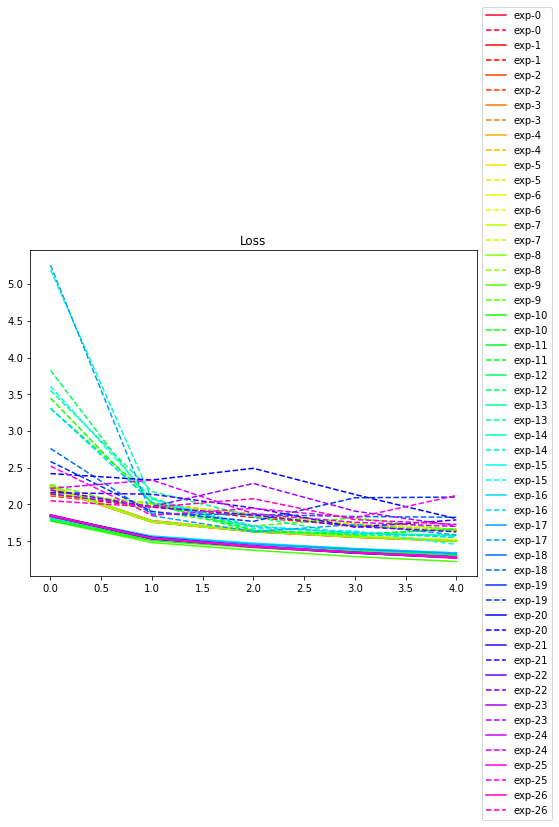

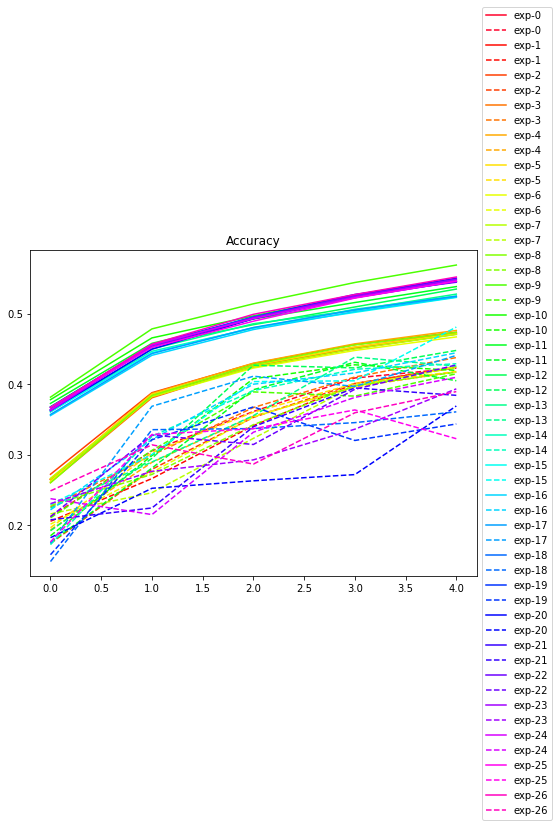

In [28]:
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline
NUM_COLORS = len(results.keys())

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()